In [68]:
gene_location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics"

species_list = ["1.Lasiomatta_megera","2.Pieris_napi","3.Pararge_aegeria"]
runs_list = ["1.Rho Set","2.BUSCO set"]

go_term_list_dictionary = {}
output = "GO_Term,Term,Las_RHO,Nap_RHO,Par_RHO,Las_BUSCO,Nap_BUSCO,Par_BUSCO"
counter = 0
for rn_count, runs in enumerate(runs_list):
    
    for sp_count, species in enumerate(species_list):
        counter += 1
        with open(f"{gene_location}/{species}/4.Intersections_test/1.For GSEA/{runs}/intersection_set.txt.MF.GSEA_result.tsv" , 'r') as run_file:
            for lines in run_file.readlines()[1:]:
                lines_split = lines.strip().split("\t")
                if float(lines_split[-1]) < 0.05:
                    if lines_split[0] not in go_term_list_dictionary:
                        go_term_list_dictionary[lines_split[0]] = [lines_split[1].replace(",",''), "0","0","0","0","0","0"]
                    enrichment = float(lines_split[3])/float(lines_split[4])
                    go_term_list_dictionary[lines_split[0]][counter] = str(round(enrichment,3))
                    # print(runs,species,counter)
                    # print(go_term_list_dictionary[lines_split[0]])
                    # assert False


In [69]:
go_term_list_dictionary

{'GO:0044877': ['protein-containing complex binding',
  '2.584',
  '0',
  '0',
  '0',
  '0',
  '0'],
 'GO:0019894': ['kinesin binding', '10.0', '0', '0', '0', '0', '0'],
 'GO:0016273': ['arginine N-methyltransferase activity',
  '11.111',
  '0',
  '0',
  '0',
  '0',
  '0'],
 'GO:0042393': ['histone binding', '3.571', '0', '3.247', '1.592', '0', '0'],
 'GO:0031491': ['nucleosome binding', '11.538', '0', '8.333', '0', '0', '0'],
 'GO:0140993': ['histone modifying activity',
  '3.846',
  '0',
  '0',
  '0',
  '0',
  '0'],
 'GO:0005488': ['binding', '1.133', '0', '0', '0', '0', '0'],
 'GO:0052689': ['carboxylic ester hydrolase activity',
  '3.226',
  '0',
  '0',
  '0',
  '0',
  '0'],
 'GO:0016705': ['oxidoreductase activity acting on paire...',
  '2.817',
  '0',
  '0',
  '0',
  '0',
  '0'],
 'GO:0008081': ['phosphoric diester hydrolase activity',
  '5.405',
  '0',
  '0',
  '0',
  '0',
  '3.553'],
 'GO:0042805': ['actinin binding', '0', '33.333', '0', '0', '5.882', '0'],
 'GO:0050839': ['cel

In [70]:
output = "GO_Term,Term,Las_RHO,Nap_RHO,Par_RHO,Las_BUSCO,Nap_BUSCO,Par_BUSCO"
for key,value in go_term_list_dictionary.items():
    output += f"\n{key},{','.join(value)}"
with open("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Go_table_MF.csv", 'w') as out_file:
    out_file.write(output)
# print(output)

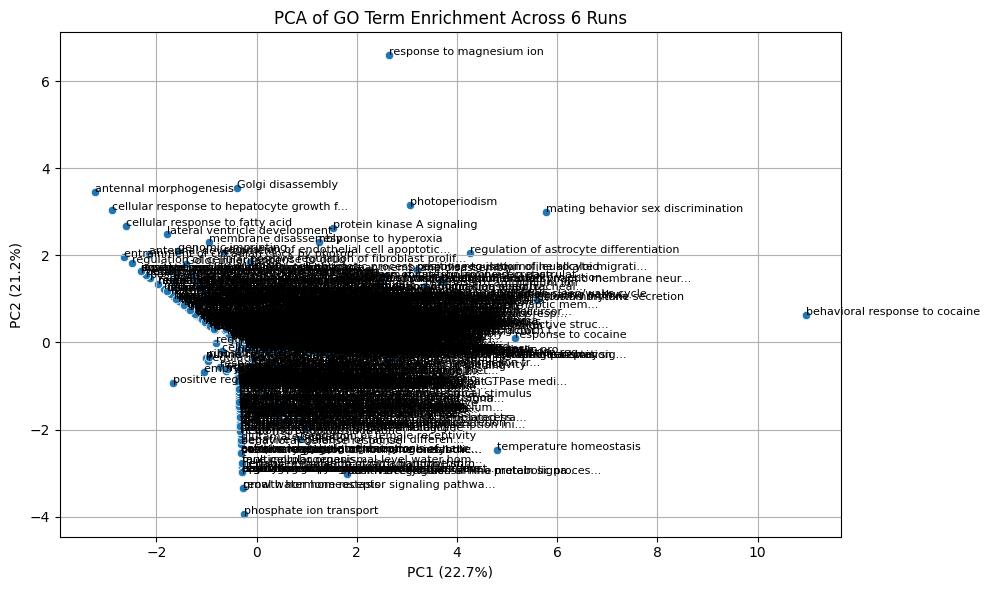

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your table (GO terms as rows, enrichment per run as columns)
df = pd.read_csv("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Go_table.csv")  # Replace with your file

# Keep only enrichment score columns
enrichment_df = df.filter(like='_')
# print(enrichment_df)
# assert False
# Optional: fill missing values (you can experiment with 0, 1, or mean imputation)
enrichment_df = enrichment_df.fillna(1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(enrichment_df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['GO Term'] = df['Term Name']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
for i, row in pca_df.iterrows():
    plt.text(row['PC1'], row['PC2'], row['GO Term'], fontsize=8)
plt.title("PCA of GO Term Enrichment Across 6 Runs")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.grid(True)
plt.tight_layout()
plt.show()

            Las_RHO  Nap_RHO  Par_RHO  Las_BUSCO  Nap_BUSCO  Par_BUSCO
GO ID                                                                 
GO:0065007    1.201    1.279    1.195      1.045       1.08      0.000
GO:0048800   13.333    0.000    0.000      4.301       0.00      0.000
GO:0048519    1.399    1.481    1.321      1.103       0.00      0.000
GO:0000387    7.143    0.000    0.000      1.880       0.00      0.000
GO:0050789    1.205    1.293    1.190      1.054       0.00      0.000
...             ...      ...      ...        ...        ...        ...
GO:2001242    0.000    0.000    0.000      0.000       0.00      1.475
GO:0043455    0.000    0.000    0.000      0.000       0.00      3.191
GO:0098771    0.000    0.000    0.000      0.000       0.00      1.694
GO:0045089    0.000    0.000    0.000      0.000       0.00      1.358
GO:0000154    0.000    0.000    0.000      0.000       0.00      2.222

[702 rows x 6 columns]


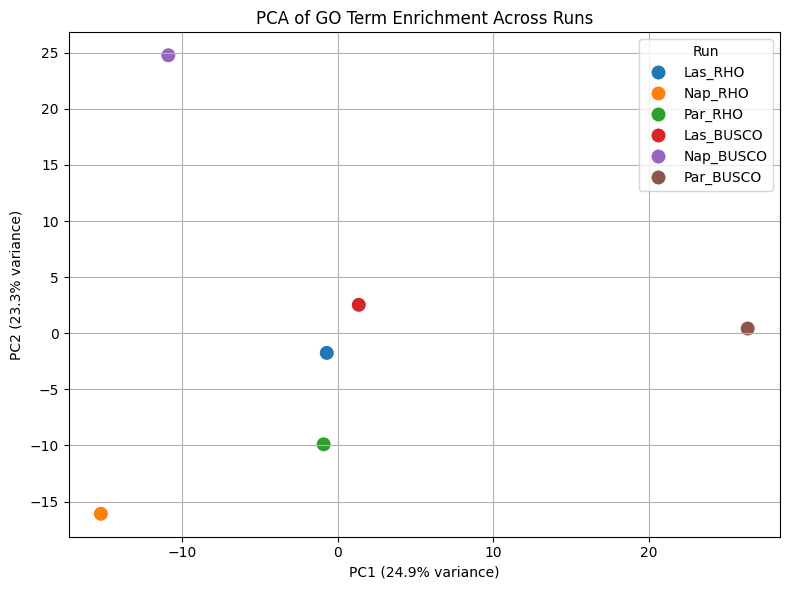

In [40]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the file
df = pd.read_csv("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Go_table.csv")  # 

# Step 2: Set GO ID as index (optional, helpful for tracking)
df.set_index("GO ID", inplace=True)

# Step 3: Extract only enrichment values for PCA
enrichment_data = df.iloc[:, 1:]  # Skip 'Term Name' and just use the run columns
# print(enrichment_data)
# Step 4: Transpose so rows = runs, columns = GO terms
enrichment_matrix = enrichment_data.T

# Step 5: Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(enrichment_matrix)

# Step 6: PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 7: Prepare for plotting
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Run"] = enrichment_matrix.index

# Step 8: Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Run", s=120)
plt.title("PCA of GO Term Enrichment Across Runs")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

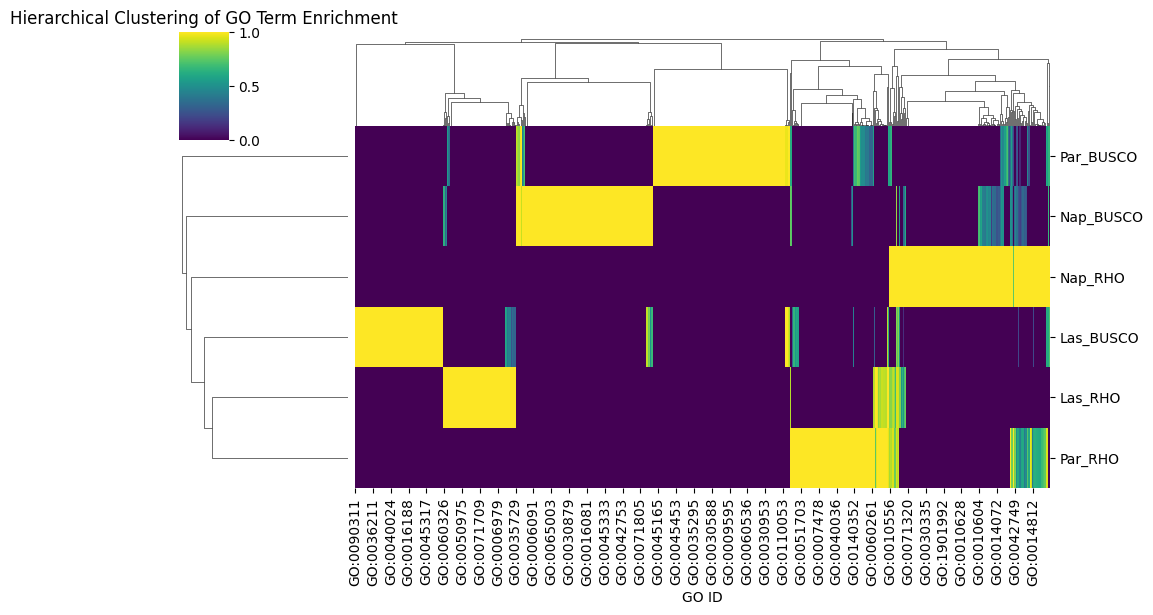

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reuse the enrichment_data matrix (GO terms x runs)
sns.clustermap(enrichment_data.T, method="average", metric="euclidean",
               cmap="viridis", figsize=(10, 6), standard_scale=1)
plt.title("Hierarchical Clustering of GO Term Enrichment")
plt.show()

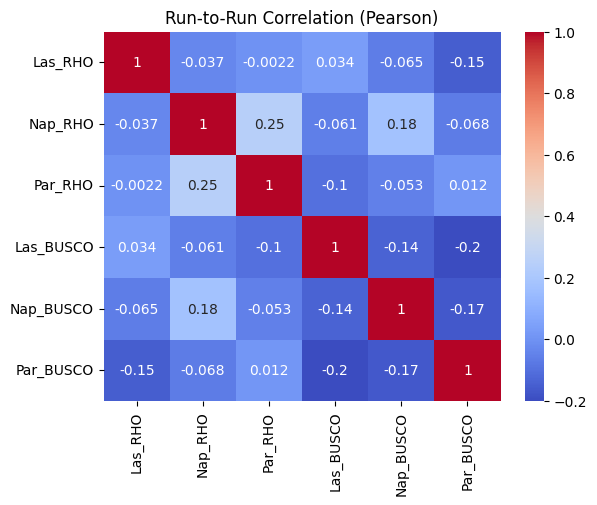

In [42]:
corr = enrichment_data.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Run-to-Run Correlation (Pearson)")
plt.show()

/home/saurav/.local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


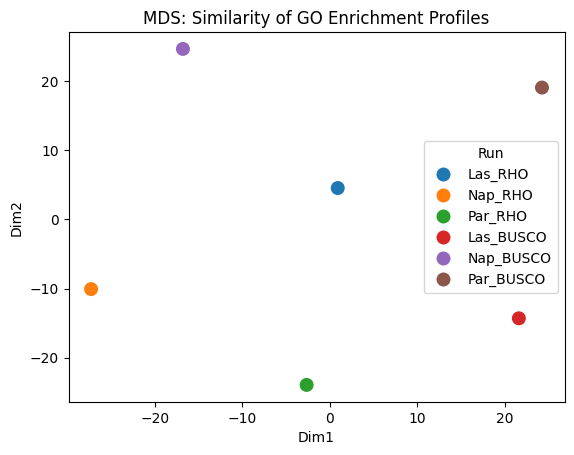

In [43]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="euclidean", random_state=42)
mds_coords = mds.fit_transform(scaled_data)

mds_df = pd.DataFrame(mds_coords, columns=["Dim1", "Dim2"])
mds_df["Run"] = enrichment_matrix.index

sns.scatterplot(data=mds_df, x="Dim1", y="Dim2", hue="Run", s=120)
plt.title("MDS: Similarity of GO Enrichment Profiles")
plt.show()

In [45]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd

# Use enrichment_data from earlier (GO terms x runs)
enrichment_data = df.iloc[:, 1:]  # Only the enrichment columns
run_names = enrichment_data.columns
# print(enrichment_data)
# Compute pairwise distance matrix (Euclidean)
dist_matrix = pd.DataFrame(
    squareform(pdist(enrichment_data.T, metric='euclidean')),
    index=run_names, columns=run_names
)
print(dist_matrix)

              Las_RHO     Nap_RHO     Par_RHO   Las_BUSCO   Nap_BUSCO  \
Las_RHO      0.000000  152.899055  114.167656   71.379202   84.793911   
Nap_RHO    152.899055    0.000000  142.327897  141.867571  135.030313   
Par_RHO    114.167656  142.327897    0.000000  100.990216  106.638324   
Las_BUSCO   71.379202  141.867571  100.990216    0.000000   60.419173   
Nap_BUSCO   84.793911  135.030313  106.638324   60.419173    0.000000   
Par_BUSCO   79.651273  142.645107   99.247320   49.056150   64.926532   

            Par_BUSCO  
Las_RHO     79.651273  
Nap_RHO    142.645107  
Par_RHO     99.247320  
Las_BUSCO   49.056150  
Nap_BUSCO   64.926532  
Par_BUSCO    0.000000  


In [46]:
rho_runs = [col for col in enrichment_data.columns if "RHO" in col]
busco_runs = [col for col in enrichment_data.columns if "BUSCO" in col]

In [47]:
from itertools import combinations

def mean_pairwise_distance(group, dist_matrix):
    pairs = list(combinations(group, 2))
    return sum(dist_matrix.loc[a, b] for a, b in pairs) / len(pairs)

rho_dist = mean_pairwise_distance(rho_runs, dist_matrix)
busco_dist = mean_pairwise_distance(busco_runs, dist_matrix)
inter_group_dist = sum(dist_matrix.loc[a, b] for a in rho_runs for b in busco_runs) / (len(rho_runs) * len(busco_runs))

print(f"Mean RHO distance:    {rho_dist:.3f}")
print(f"Mean BUSCO distance:  {busco_dist:.3f}")
print(f"Mean RHO–BUSCO distance: {inter_group_dist:.3f}")



Mean RHO distance:    136.465
Mean BUSCO distance:  58.134
Mean RHO–BUSCO distance: 106.916


In [51]:
from skbio.stats.distance import DistanceMatrix
from skbio.stats.distance import permanova
import numpy as np

# Create DistanceMatrix object
dm = DistanceMatrix(dist_matrix.values, ids=dist_matrix.index)

# Define grouping: e.g., ["RHO", "RHO", "RHO", "BUSCO", "BUSCO", "BUSCO"]
grouping = ["RHO" if "RHO" in name else "BUSCO" for name in dist_matrix.index]

# Run PERMANOVA
results = permanova(dm, grouping, permutations=999)
print(results)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                       6
number of groups                  2
test statistic             1.249298
p-value                       0.308
number of permutations          999
Name: PERMANOVA results, dtype: object


In [53]:
import pandas as pd
from sklearn.decomposition import PCA

# Load your data (excluding metadata columns)
df = pd.read_csv("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Go_table.csv", index_col=1)
data = df.iloc[:, 1:].T  # Transpose to have runs as rows

# Run PCA
pca = PCA(n_components=2)
pca.fit(data)

# Get loading scores (GO terms x PC axes)
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=['PC1', 'PC2'])

# Sort by absolute contribution to PC1 (which separates RHO runs)
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False)
print("Top GO terms driving PC1 separation:\n", top_features_pc1.head(10))
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False)
print("Top GO terms driving PC1 separation:\n", top_features_pc2.head(10))

Top GO terms driving PC1 separation:
 Term Name
behavioral response to cocaine                 0.342796
regulation of postsynaptic membrane neur...    0.240051
mating behavior sex discrimination             0.230045
eclosion rhythm                                0.207499
growth hormone secretion                       0.207499
regulation of astrocyte differentiation        0.200254
protein kinase A signaling                     0.198538
ligand-gated ion channel signaling pathw...    0.180040
response to cocaine                            0.159714
response to magnesium ion                      0.150272
Name: PC1, dtype: float64
Top GO terms driving PC1 separation:
 Term Name
serotonin receptor signaling pathway           0.238072
G protein-coupled serotonin receptor sig...    0.238072
regulation of growth hormone secretion         0.238072
temperature homeostasis                        0.194754
negative regulation of transcription reg...    0.189059
regulation of microvillus organization

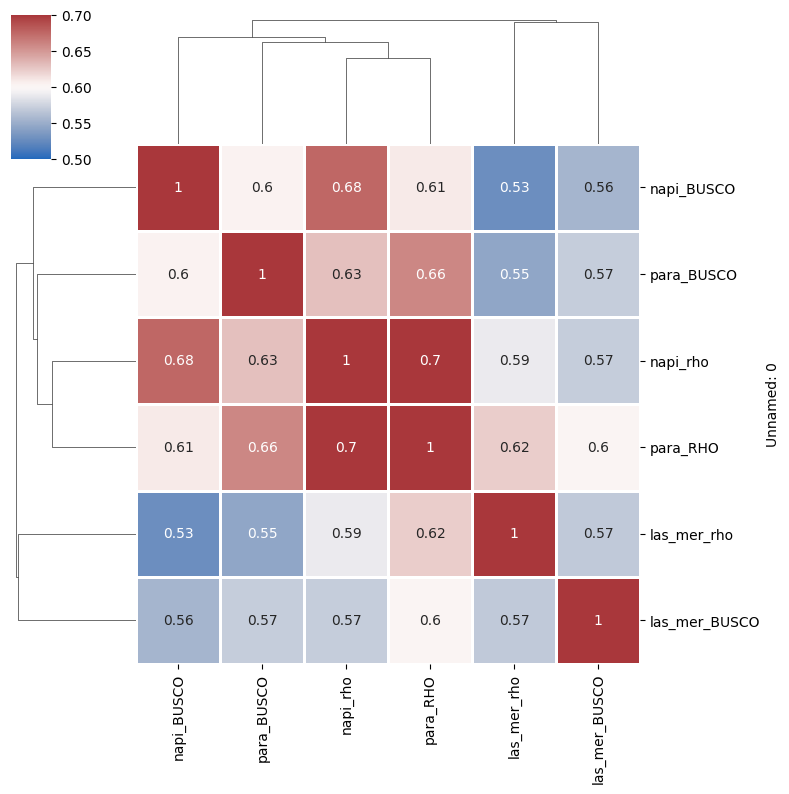

In [56]:
import pandas as pd
df = pd.read_csv("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Simantic search.txt", sep= "\t")
df.set_index(df.columns[0], inplace=True)

# Convert all columns to numeric (in case of string dtype)
df = df.apply(pd.to_numeric)

# Plot the clustered heatmap
sns.clustermap(df, cmap="vlag", linewidths=0.75,  vmin=0.5, vmax=0.7,figsize=(8, 8), annot=True)
plt.show()

/tmp/ipykernel_13669/1808082948.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = data.applymap(lambda x: 1 if x > threshold else 0)


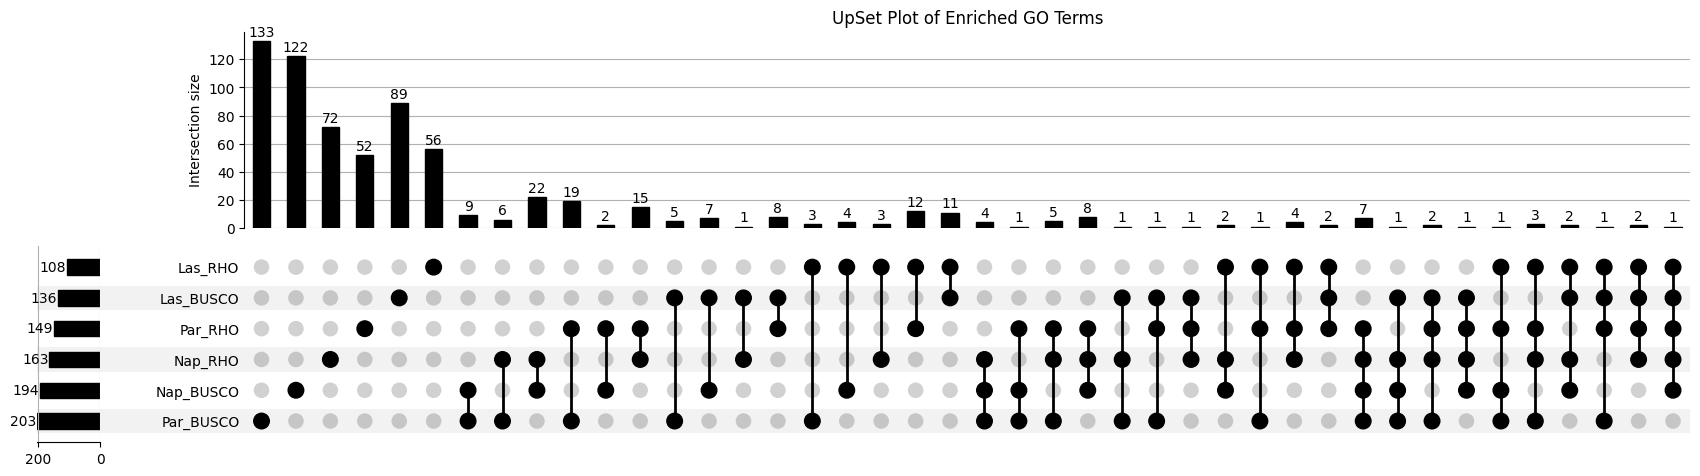

In [59]:
import pandas as pd
from upsetplot import from_indicators, plot
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Go_table.csv")  # Replace with actual file path or use df directly

# Set GO Term as index (optional, for clarity)
df['GO Term'] = df['GO ID'] + ' ' + df['Term Name']
df.set_index('GO Term', inplace=True)

# Use only the enrichment columns
data = df[['Las_RHO', 'Nap_RHO', 'Par_RHO', 'Las_BUSCO', 'Nap_BUSCO', 'Par_BUSCO']]

# Apply threshold to create binary presence/absence matrix
threshold = 0  # You can change this
binary_data = data.applymap(lambda x: 1 if x > threshold else 0)


binary_data = binary_data.astype(bool)

# Convert to UpSet-compatible format
upset_data = from_indicators(binary_data.columns.tolist(), binary_data)

# Plot
plot(upset_data, show_counts=True)
plt.title('UpSet Plot of Enriched GO Terms')
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


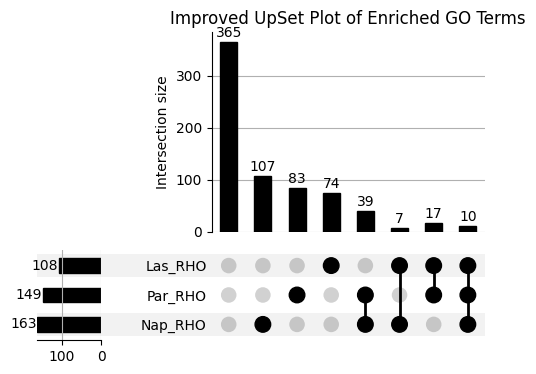

In [67]:
%reset

import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/4.All_GO_Enrichment/Go_table.csv")  # 
df['GO ID'] = df['GO ID'] + ' ' + df['Term Name']
# df.set_index('GO Term', inplace=True)

df = df[['Las_RHO', 'Nap_RHO', 'Par_RHO']]
sets = []
for i, row in df.iterrows():
    members = []
    for col in df.columns[:]:
        if row[col]:
            members.append(col)
    sets.append(members)

# Create upset plot data
upset_data = from_memberships(sets)

# Create plot
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("Improved UpSet Plot of Enriched GO Terms")
plt.show()